In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

## Primer punto: Analsis exploratorio de datos 

In [7]:
#Análisis exploratorio de datos

datos_cel= pd.read_excel("A375.xlsx") #Leer el excel 
print(tabulate(df, headers='keys', tablefmt='github', showindex=True))

|    |   Bloque2 |   Estimulo2 |   Tiempo2 |   Viabilidad2 |
|----|-----------|-------------|-----------|---------------|
|  0 |         3 |           1 |         7 |       59.7516 |
|  1 |         3 |           1 |         1 |       75.0419 |
|  2 |         3 |           2 |         1 |       75.3769 |
|  3 |         3 |           1 |         7 |       80.1719 |
|  4 |         3 |           1 |         7 |       80.1719 |
|  5 |         3 |           2 |         7 |       82.6087 |
|  6 |         3 |           2 |         1 |       88.9213 |
|  7 |         3 |           2 |         7 |       89.2572 |
|  8 |         3 |           2 |         7 |       89.2572 |
|  9 |         3 |           1 |         1 |       91.4894 |
| 10 |         3 |           2 |         1 |      100.685  |
| 11 |         3 |           1 |         1 |      100.685  |
| 12 |         3 |           1 |         1 |      106.706  |
| 13 |         3 |           2 |         1 |      128.085  |
| 14 |         4 |      

In [8]:
#Construcción de un DataFrame de los estadisticos de las varibles 

#Tipos de datos: Variables numéricas y Variables categóricas

def valores_estadisticos(valores):  #Funcion para calculo de metricas estadisticas

    """
    Función: Calcula varias medidas estadísticas descriptivas a partir de una lista o array de valores.
    Parámetros:
    valores (list): Conjunto de datos numéricos o categóricos.

    Retorna:
    list: Una lista con las medidas estadísticas solicitadas en orden:
     
    Notas:
    - Si los datos no son numéricos, se intentará obtener únicamente la moda.
    - En caso de que no exista una moda única, se devuelve el string 'No única'.
    """
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]

# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in datos_cel.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(tabulate(estadisticas_df, headers='keys', tablefmt='github', showindex=True))

|          |   Bloque2 |   Estimulo2 |   Tiempo2 |   Viabilidad2 |
|----------|-----------|-------------|-----------|---------------|
| Media    |  3.41667  |    1.5      |  3.5      |    101.884    |
| Mediana  |  3        |    1.5      |  1        |     98.6111   |
| Moda     |  3        |    1        |  1        |     80.1719   |
| SD       |  0.50361  |    0.510754 |  3.02166  |     23.5526   |
| MAD      |  0.486111 |    0.5      |  2.91667  |     18.8448   |
| Varianza |  0.253623 |    0.26087  |  9.13043  |    554.724    |
| IQR      |  1        |    1        |  6        |     31.3869   |
| CV       |  0.147398 |    0.340503 |  0.863332 |      0.23117  |
| CVM      |  0.142276 |    0.333333 |  0.833333 |      0.184963 |


#### Analisis de viabilidad 
Dado que el SD es mayor que el MAD y su distancia se considera significativamente grande por lo tanto se puede deducir que posiblemente valores atípicos 

### Verificación de datos atípicos 

In [ ]:
def analizar_outliers_con_grafico(serie, nombre):
    datos = np.array(serie)
    datos_validos = datos[~np.isnan(datos)]

    if len(datos_validos) == 0:
        print(f"\n{nombre}: Todos los valores son NaN")
        return

    # Cálculo de outliers
    Q1, Q3 = np.percentile(datos_validos, [25, 75])
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = datos_validos[(datos_validos < lim_inf) | (datos_validos > lim_sup)]
    n_outliers = len(outliers)

    # Resultados
    print(f"\n{'='*60}")
    print(f" ANÁLISIS DE OUTLIERS: {nombre.upper()}")
    print(f"• Valores totales: {len(serie)} | Válidos: {len(datos_validos)}")
    print(f"• Número de outliers: {n_outliers}")

    if n_outliers > 0:
        indices_outliers = np.where((datos < lim_inf) | (datos > lim_sup))[0]
        df_outliers = pd.DataFrame({
            'Índice': indices_outliers,
            'Valor': datos[indices_outliers]
        })
        print("\nOutliers detectados:")
        print(tabulate(df_outliers, headers='keys', tablefmt='github', showindex=False))

    # Gráfico mejorado
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Boxplot con seaborn
    ax = sns.boxplot(x=datos_validos, color='skyblue', fliersize=8, linewidth=2)

    sns.stripplot(x=datos_validos, color='darkblue', size=6, jitter=True, alpha=0.6)

    # Líneas para límites de outliers
    plt.axvline(lim_inf, color='red', linestyle='--', label=f'Límite inferior ({lim_inf:.2f})')
    plt.axvline(lim_sup, color='red', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')

    plt.title(f'Distribución y Outliers de {nombre}', fontsize=16)
    plt.xlabel('Valor', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

#como ya sabemos por el proyecto 1 que las variables aveORALM, T_atm y Humidity tienen outliers, se le aplica la función unicamente a las del proyecto 2

analizar_outliers_con_grafico(datos_cel['Viabilidad2'], 'Viabilidad2')


#### Analisis de datos atipicos

* Los datos están ligeramente sesgados hacia la izquierda (asimetría negativa), ya que la mediana está más cerca de Q1 que de Q3.

* No se observan outliers en la viabilidad, lo cual es positivo para los supuestos del ANOVA.

* Existe una alta variabilidad en la viabilidad celular entre condiciones experimentales, lo cual podría deberse a los efectos de los tratamientos-
La distribución no es perfectamente simétrica, por lo que sería útil corroborar la normalidad de los residuos al aplicar ANOVA.



#### Histograma datos  de viabilidad 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_histograma(data, columna, bins=10, color='skyblue'):
    """
    Grafica el histograma de una columna específica de un DataFrame.

    Parámetros:
    - data: DataFrame de pandas que contiene la columna.
    - columna: nombre de la columna a graficar.
    - bins: número de divisiones del histograma (default 10).
    - color: color de las barras del histograma.
    """
    plt.figure(figsize=(10, 5))
    sns.histplot(data[columna], bins=bins, kde=True, color=color, edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

graficar_histograma(datos_cel,'Viabilidad2')


### Analisis de histogramas 
**Viabilidad:** El histograma confirma lo observado en el boxplot:Distribución ligeramente asimétrica a la derecha, la mayoría de datos concentrados entre 80 y 120. No se  presentan valores atípicos visibles.De manera generla los datos son estable y homogéneo, util para análisis comparativos o modelos simples sin necesidad de transformaciones complejas. 



In [ ]:
def graficar_categorias_desde_lista(lista, titulo="Frecuencia por categoría", color='lightgreen'):
    """
    Genera una gráfica de barras para una lista de datos categóricos.
    """
    conteo = Counter(lista)
    
    categorias = list(conteo.keys())
    frecuencias = list(conteo.values())

    x = list(range(len(categorias)))  # convertir las categorías a índices numéricos

    plt.figure(figsize=(10, 6))
    plt.bar(x, frecuencias, color=color, edgecolor='black')
    plt.xticks(ticks=x, labels=categorias, rotation=45)
    plt.title(titulo)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")

    for i, valor in enumerate(frecuencias):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

graficar_categorias_desde_lista(datos_cel['Estimulo2'], 'Estimulo',color='purple' )
graficar_categorias_desde_lista(datos_cel['Tiempo2'], 'Tiempo',color='lightblue' )

### Analisis de garfico de barras para variables categoricas 
1. **Tiempo:** No hay datos entre esos puntos 1 y 7, lo que refuerza la propiedad categórica de los datos.Esto sugiere que cualquier análisis como ANOVA o pruebas t debe tratar Tiempo2 como una variable de agrupación, no como una variable numérica.

2. **Estimulos:** Cpmfirma que debe ser tratado como una variables de agrupacion al momento de realizar la ANOVA o la prueba t.  


Matriz de correlación:
                Estimulo        Tiempo  Viabilidad
Estimulo    1.000000e+00  3.127699e-17    0.283464
Tiempo      3.127699e-17  1.000000e+00   -0.392474
Viabilidad  2.834636e-01 -3.924738e-01    1.000000


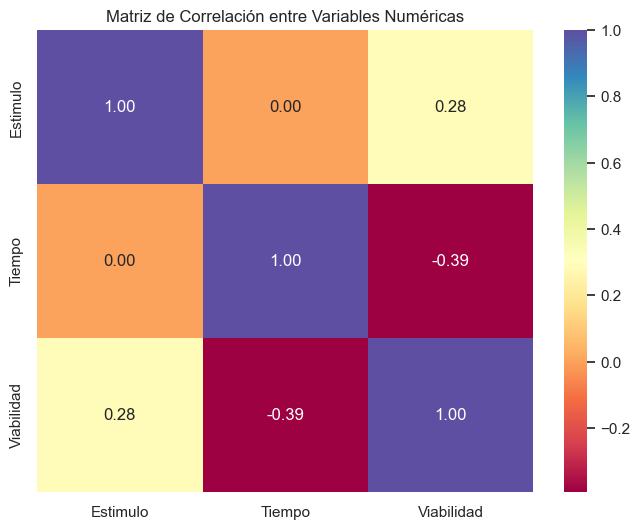

In [33]:
variables={
    "Estimulo":datos_cel['Estimulo2'],
    "Tiempo":datos_cel['Tiempo2'],
    "Viabilidad":datos_cel['Viabilidad2']

}
data_variables=pd.DataFrame(variables)

# Calcular matriz de correlación
matriz_corr = data_variables.corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(matriz_corr)

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Analisi de mapa de calor 
La correlación negativa entre tiempo y viabilidad celular indica que una mayor exposición a las AuNPs reduce la viabilidad, apoyando la hipótesis del efecto térmico acumulativo. Aunque el estímulo tiene poca influencia, el recubrimiento con PEG y el tiempo prolongado parecen clave para aumentar la eficacia del tratamiento.

## Punto 2: Analisis expliratorio de datos 
Se realizan la corroboracion de supuestos para realizar la ANOVA 